# Statistics for Data Analysis

In this notebook, we will explore statistics for data analysis from a practical, visual, and business-oriented perspective. The aim is to dive into:

- Plotting techniques using Matplotlib and Seaborn to represent different types of variables and aggreations (E.g visualize categorical variable, continous, categorical vs continuous...)

- Apply key statistical concepts—descriptive stats, correlation, distributions, and outlier detection—to real-world data.


To ground these statistical concepts in a realistic business scenario, we'll keep working beloved game company **Entero** 🎮 and its latest game **Globba** 🥳.

Six months after the game's release, the company is eager to understand how players are interacting with the game.

How long they`ve been playing, how much they've progressed, how engaged they are and how much they're spending.

Entero managed to get a rich dataset that captures key player characteristics from 5000 users such as platform, age, region, gameplay behavior, and in-game purchases (detailed description few cells below)

The goal is to analyze the player base from a visual perspective in order to get a better understanding of the clients (players).

# 1.&nbsp; Set up

Let's import the main libraries (later we will import the plotting ones)

In [2]:
import pandas as pd
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


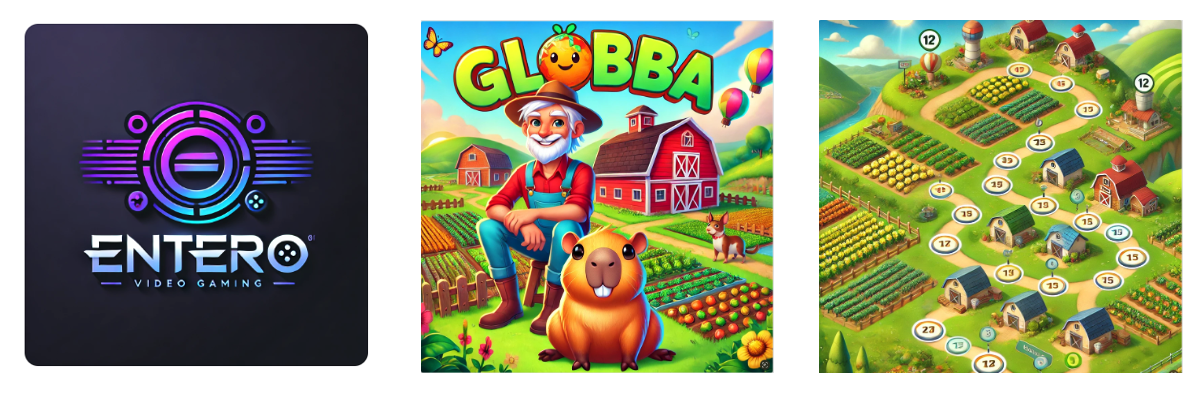

In [4]:
path_image_entero = '/content/drive/MyDrive/Python_for_ESADE/Session_3_Descriptive_statistics/images/entero_globba_all.png'
path_data = '/content/drive/MyDrive/Python_for_ESADE/Session_3_Descriptive_statistics/datasets/player_base.xlsx'

from IPython.display import Image, display
display(Image(filename=path_image_entero))

The dataset that will be used has the following columns:

- **playerid:** Unique identifier for each player

- **platform:** Platform used to player the game (iOS, Android, Amazon, Web)

- **age:** Age of the player (between 18 and 75)

- **daysingame:** Number of days since the player started playing (E.g 60, player started playing 60 days ago)

- **companygamesplayed:** Number of other games from Entero that the player has played. (Entero has more games apart from Globba, if value is 3 means player has tried other 3 Entero games)

- **gameroundsplayed:** Total number of rounds played in Globba. (Note player can even win or lose that gameround)

- **levelscompleted:** Number of levels completed in the game (Can be understood as progression, e.g 189 means player completed 189 games).

- **moneyspent:** Amount of money the player has spent in the game in $.

- **region:** Geographic region of the player (US, Europe, China, Australia)


Let's read the dataset

In [5]:
df_player = pd.read_excel(path_data)

In [6]:
df_player.head()

,playerid,platform,age,daysingame,companygamesplayed,gameroundsplayed,levelscompleted,moneyspent,region
0,P00001,iOS,34,104,2,113,92,4.95,US
1,P00002,iOS,28,129,3,164,8,0.74,US
2,P00003,Amazon,36,56,1,386,1,8.75,China
3,P00004,iOS,45,118,0,35,21,154.19,US
4,P00005,iOS,27,132,2,104,84,30.74,Europe


Let's selected a specific player. For instance playerid = P00105 and try to understand the information/characteristics captured

In [23]:
df_player[df_player['playerid']=='P00105']

,playerid,platform,age,daysingame,companygamesplayed,gameroundsplayed,levelscompleted,moneyspent,region
104,P00105,Amazon,28,93,3,484,240,31.51,China


From an individual to a global perspective, let's get a high level understanding of the data by using .describe() and .info() methods

📝 Note: .describe() only summarizes numerical variables by default!

In [7]:
df_player.describe()

,age,daysingame,companygamesplayed,gameroundsplayed,levelscompleted,moneyspent
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,30.161400,89.605200,1.660800,303.314000,103.131800,20.957702
std,8.905078,51.416632,1.249502,151.553287,99.986789,21.999717
min,18.000000,1.000000,0.000000,2.000000,0.000000,0.000000
25%,23.000000,46.000000,1.000000,192.000000,7.000000,5.027500
50%,30.000000,88.000000,1.000000,303.000000,72.000000,13.970000
75%,36.000000,133.000000,3.000000,403.000000,218.000000,29.845000
max,69.000000,180.000000,4.000000,646.000000,250.000000,190.420000


In [8]:
df_player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   playerid            5000 non-null   object 
 1   platform            5000 non-null   object 
 2   age                 5000 non-null   int64  
 3   daysingame          5000 non-null   int64  
 4   companygamesplayed  5000 non-null   int64  
 5   gameroundsplayed    5000 non-null   int64  
 6   levelscompleted     5000 non-null   int64  
 7   moneyspent          5000 non-null   float64
 8   region              5000 non-null   object 
dtypes: float64(1), int64(5), object(3)
memory usage: 351.7+ KB


# 2.&nbsp; Graphical libraries Matplotlib & Seaborn

In the previous session, we introduced basic plotting in Python using Pandas.
The goal of the following sections is to deep dive into data visualization in Python, focusing on two of the most widely used libraries:

- **Matplotlib:** is the foundation of all plotting in Python. It offers full control over every element of a plot — from axes and labels to tick marks, fonts, and colors. It’s incredibly flexible and powerful, but sometimes requires more code and configuration for basic visualizations. https://matplotlib.org/stable/plot_types/index.html

- **Seaborn:** is a higher-level statistical visualization library built on top of Matplotlib. It comes with beautiful default styles and supports complex plots (like correlation heatmaps, violin plots, and regression plots) with minimal code. It integrates naturally with Pandas DataFrames and works well for exploratory data analysis. https://seaborn.pydata.org/tutorial/introduction.html
https://seaborn.pydata.org/examples/index.html

Matplotlib vs. Seaborn: When to Use What?

| **Feature**             | **Matplotlib**                 | **Seaborn**                          |
|--------------------------|--------------------------------|--------------------------------------|
| Level of control         | High (low-level)               | Medium (built on Matplotlib)         |
| Ease of use              | Moderate                       | Easy and concise                     |
| Default style            | Basic                          | Beautiful & modern                   |
| Statistical support      | ❌ Manual calculations needed  | ✅ Built-in (e.g., KDE, CI)           |
| Best for                 | Customization, final exports   | EDA, quick exploration               |


In practice, it's common to start with Seaborn for exploration, and then use Matplotlib to fine-tune the layout, annotations, or export quality.

Let's important both libraries

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

## 📈 Plotting Cheat Sheet — Introduction to Data Visualization

This guide summarizes the most common **plot types** using **Matplotlib** and **Seaborn**, along with **when to use them**, **sample code**, and **what they reveal** about the data.

---

### 📊 1. Basic Plot Types — Univariate & Bivariate Analysis

| Plot Type       | When to Use               | Code Example (Matplotlib / Seaborn)                                | What It Shows                                                  |
|------------------|---------------------------|---------------------------------------------------------------------|----------------------------------------------------------------|
| **Line Plot**    | Continuous over time       | `plt.plot(x, y)`<br>`sns.lineplot(x=x, y=y, data=df)`              | Trend or evolution over time                                   |
| **Bar Chart**    | Discrete categories        | `plt.bar(x, height)`<br>`sns.barplot(x=x, y=y, data=df)`           | Comparison of values across categories                         |
| **Histogram**    | Continuous distribution    | `plt.hist(x)`<br>`sns.histplot(x=df['col'], bins=30)`              | Distribution and frequency of values     
| **Displot**      | Univariate distribution + faceting | `sns.displot(df, x='x', kind='kde')`<br> or `kind='hist'`     | Flexible distribution plot with support for faceting                        |
| **Boxplot**      | Continuous per category    | `plt.boxplot([a, b])`<br>`sns.boxplot(x='group', y='value', data=df)` | Distribution (median, IQR, outliers) by category               |
| **Violin Plot**  | Continuous per category    | N/A<br>`sns.violinplot(x='group', y='value', data=df)`             | Similar to boxplot but shows full distribution shape           |
| **Pie Chart**    | Discrete proportions       | `plt.pie(values, labels=labels)`                                   | Proportion of categories (avoid for >5 categories)             |
| **Scatter Plot** | 2 continuous variables     | `plt.scatter(x, y)`<br>`sns.scatterplot(x='x', y='y', data=df)`    | Relationship between two numeric variables                     |

---

### 📈 2. Advanced / Multivariate Visualizations

| Plot Type             | When to Use                         | Code Example                                                       | What It Shows                                                  |
|------------------------|-------------------------------------|---------------------------------------------------------------------|----------------------------------------------------------------|
| **FacetGrid**          | Same plot across subsets            | `sns.FacetGrid(df, col='group').map(sns.histplot, 'value')`        | Small multiples — helps compare patterns by subgroup           |
| **Pairplot (Scatter Matrix)** | Several numeric variables     | `sns.pairplot(df[['a', 'b', 'c']])`                                 | All pairwise relationships + distributions                     |
| **Heatmap (Correlation Grid)** | Numeric correlations         | `sns.heatmap(df.corr(), annot=True, cmap='coolwarm')`              | Visual correlation matrix (helps spot strong relationships)    |
| **Strip/Swarm Plot**   | Continuous + categorical            | `sns.swarmplot(x='group', y='value', data=df)`                     | Like scatterplot over categories — better for small samples    |
| **KDE Plot**           | Continuous distribution shape       | `sns.kdeplot(df['value'], fill=True)`                              | Smoothed distribution of a continuous variable                 |
| **Joint Plot**           | Continuous distribution shape       | `sns.joinplot(df, x, y, hue)`                              | Relationship between two variables                 |

---

### 🧪 Sample Plot Code Snippets

```python
# Line Plot
plt.plot(df['dt'], df['spend'])
plt.title("Spend Over Time")

# Bar Plot
sns.barplot(x='country', y='moneyspent', data=df_player)
or
plt.bar()

# Histogram
sns.histplot(df_player['spend'], bins=30)
or
plt.hist(df_player['moneyspent'])

# Boxplot
sns.boxplot(x='platform', y='moneyspent', data=df_player)

# Pie Chart
labels = ['Australia', 'China', 'Europe', 'US']
sizes = df_player['region'].value_counts().loc[labels]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Player Distribution by Country")

# Scatter Plot
plt.scatter(df_player['gameroundsplayed'], df_player['levelscompleted'])
plt.xlabel("Game Rounds")
plt.ylabel("Levels completed")

# Correlation Heatmap
sns.heatmap(df_player[['age','daysingame','companygamesplayed']].corr(), annot=True, cmap='coolwarm')

# Pairplot
sns.pairplot(df_player[['age','daysingame','companygamesplayed']])
```

---

### 🎯 Tips for Students

- Use **line plots** for anything changing over time (e.g., daily spend).
- Use **histograms** and **KDE plots** for distributions.
- Use **boxplots** and **violin plots** to compare distributions between groups.
- Use **scatter plots** for relationships and trends.
- Use **heatmaps** and **pairplots** for multivariate pattern discovery.

---

✅ Mastering visualization is key to finding insights before modeling!



---

## 🛠️ Customizing Plots with Matplotlib

After creating a plot, you can improve its readability and presentation using a set of plot annotation and customization functions.

These commands allow you to add titles, axis labels, legends, grids, control axis limits, and more. While your data is the core of the plot, these functions are what make it readable and interpretable — especially when you're sharing your work with others or including visualizations in reports and presentations.

| Function               | What It Does                                     | Example Usage                            |
|------------------------|--------------------------------------------------|------------------------------------------|
| `plt.figure()`          | Explicitly create a new figure (a blank canvas). Optional                         | `plt.figure(figsize=(10,6))`           |
| `plt.title()`          | Adds a title to the plot                         | `plt.title("Spend Over Time")`           |
| `plt.xlabel()`         | Labels the x-axis                                | `plt.xlabel("Date")`                     |
| `plt.ylabel()`         | Labels the y-axis                                | `plt.ylabel("Spend ($)")`                |
| `plt.xticks()`         | Sets or rotates x-axis tick labels               | `plt.xticks(rotation=45)`                |
| `plt.yticks()`         | Sets y-axis tick marks or formatting             | `plt.yticks(range(0, 100, 10))`          |
| `plt.legend()`         | Adds a legend (useful when multiple lines/groups)| `plt.legend(["Control", "Test"])`        |
| `plt.grid()`           | Adds a grid for easier reading                   | `plt.grid(True)`                         |
| `plt.xlim()` / `plt.ylim()` | Sets limits for axes                        | `plt.ylim(0, 100)`                        |
| `plt.savefig()`        | Saves the plot to a file                         | `plt.savefig("myplot.png")`              |
| `plt.show()`           | Displays the plot (especially in scripts)        | `plt.show()`                             |

---

### ✅ Quick Example

```python
plt.figure()
plt.plot(df['dt'], df['spend'])
plt.title("Daily Spend Over Time")
plt.xlabel("Date")
plt.ylabel("Spend ($)")
plt.xticks(rotation=45)
plt.grid(True)
plt.ylim(0, 100)
plt.show()
```

---

🎯 **Tip for Students:**  
Clear labels and titles make your plots easier to interpret — especially when sharing with teammates or using in presentations.



# 3.&nbsp; Graphical summary for a single categorical/discrete variable

For the given dataset, there are two categorical variables such as **platform** and **region**.

The appropiate graphs for categorical variables are bar chart and pie chart.

For **platform** let's build a bar chart, for **region** a pie chart

#### Bar chart

As captured in the Cheat sheet the main sytax for a bar chart are:

* For Matplotlib

  - `plt.bar(x, height)`

* For Seaborn

 - `sns.barplot(x=x,y=y,data=df)`

Just like in Excel, when we want to visualize how often each category appears in a variable, we first need to count the occurrences. Let’s walk through this process in two clear steps:

  **1.- Creating intermidiate dataframe**

  - 1.1. Use a pivot table to calculate the number of players for each category of a variable — starting with platform (we'll do region next).
Store the result in a new DataFrame for easier plotting.

  - 1.2 Create a bar chart (or any other suitable plot) to visualize the distribution of the categorical variable.

Later we will also see a nice shortcut that seaborn provides for this particular scenario for counting  occurences without the intermidiate step

Let's dive into it


**1.- Creating intermidiate dataframe**

In [24]:
df_platform = pd.pivot_table(df_player, index='platform', values='playerid', aggfunc='count')
df_platform

,playerid
platform,
Amazon,511
Android,1879
Web,351
iOS,2259


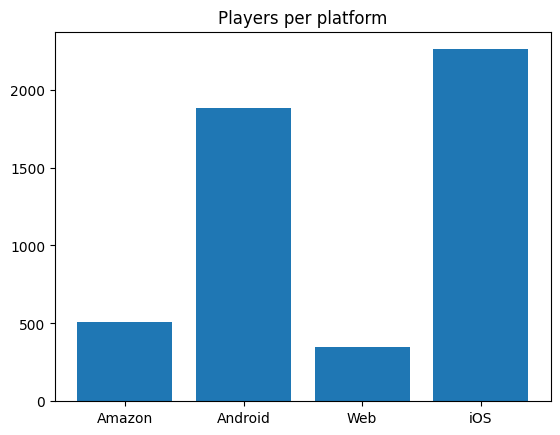

In [25]:
# Bar chart with matplotlib
plt.figure()
plt.title('Players per platform')
plt.bar(df_platform.index, df_platform['playerid'])
plt.show()

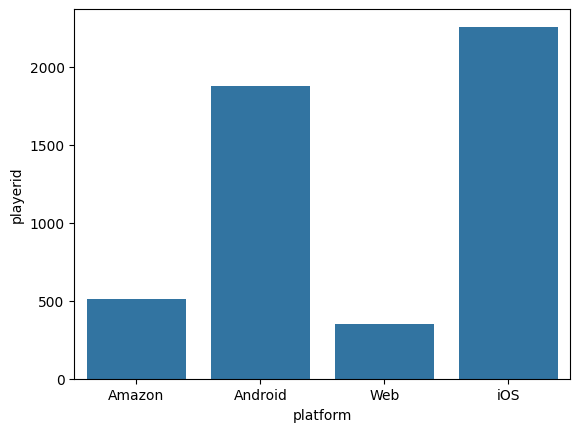

In [26]:
# Bar chart with seaborn using df_platform use different
plt.figure()
sns.barplot(data=df_platform, x=df_platform.index, y='playerid')
plt.show()


**2.- Withouth using intermidiate dataframe**

In the previous step, we used a pivot table to manually count how many players belonged to each category (like platform), and then plotted the results.

However, when using Seaborn's `countplot()`, there's no need to count the values beforehand — it does that for you automatically!

The `countplot()` function:

- Takes a categorical variable as input,

- Internally counts how many times each category appears, and

- Plots the result as a bar chart.

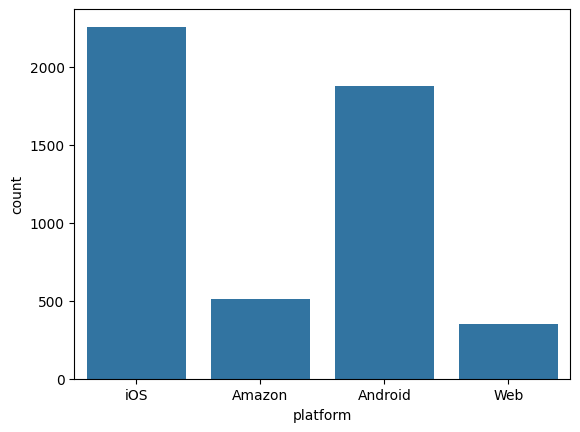

In [ ]:
# Bar chart with seaborn
plt.figure()
sns.countplot(data=df_player, x='platform')
plt.show()

## Pie Chart

As captured in the Cheat sheet the main sytax for a pie chart is:

* For Matplotlib

  - `plt.pie(values, labels=)`

IMPORTANT --> Seaborn doesn't support pie chart, thus let's use matlplotlib



Let's use **region** to get a pie chart

In [ ]:
df_region = pd.pivot_table(df_player, index='region', values='playerid', aggfunc='count')
df_region

,playerid
region,
Australia,507
China,485
Europe,1299
US,2709


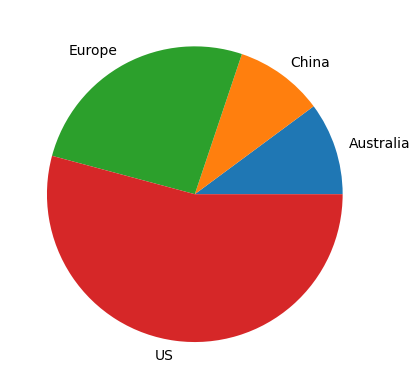

In [ ]:
# Pie chart with matplotb for Region
plt.figure()
plt.pie(df_region['playerid'], labels=df_region.index)
plt.show()


# 4.&nbsp; Graphical summary for a single continuos variable

As covered in Descriptive Statistics and Probability for numerical variables suggestion is to use the following type of graphs:

**- Histogram:** A histogram displays the distribution of a numerical variable by dividing the data into intervals (bins) and showing how many observations fall into each bin.

**- Density plot:** A density plot is a smoothed version of a histogram. It estimates the probability distribution of a continuous variable using a kernel function.

**- Boxplot:** A boxplot shows the five-number summary of a dataset: minimum, first quartile (Q1), median, third quartile (Q3), and maximum. It also highlights outliers.

As captured in the cheat sheet the main commands will be

| Plot Type       | When to Use               | Code Example (Matplotlib / Seaborn)                                | What It Shows                                                  |
|------------------|---------------------------|---------------------------------------------------------------------|----------------------------------------------------------------|
             |
| **Histogram**    | Continuous distribution    | `plt.hist(x)`<br>`sns.histplot(x=df['col'], bins=30)`              | Distribution and frequency of values     
| **Displot**      | Univariate distribution + faceting | `sns.displot(df, x='x', kind='kde')`<br> or `kind='hist'`     | Flexible distribution plot with support for faceting                        |
| **Boxplot**      | Continuous per category    | `plt.boxplot([a, b])`<br>`sns.boxplot(x='group', y='value', data=df)` | Distribution (median, IQR, outliers) by category               |                |


Recall that our dataset has several continouous variables such as:

- **Age**

- **daysingame**

- **companygamesplayed**

- **gameroundsplayed**

- **levelscompleted**

- **moneyspent**

Let's use them to create some viz

#### Histogram

Let's use for histogram **levelscompleted** variable

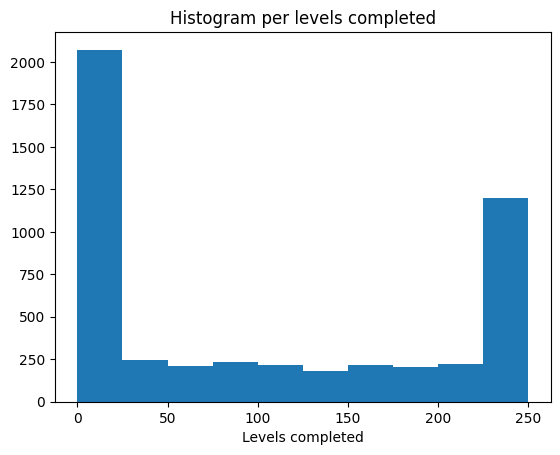

In [ ]:
# Histogram for levels completed matplotlib
plt.figure()
plt.title('Histogram per levels completed')
plt.hist(df_player['levelscompleted'])
plt.xlabel('Levels completed')
plt.show()

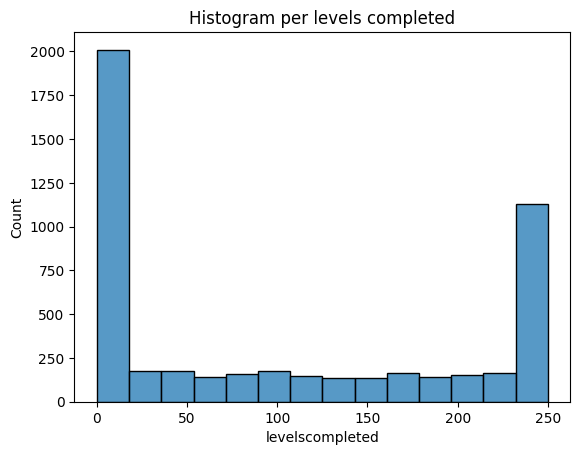

In [ ]:
# Histogram of levels completed seaborn
plt.figure()
plt.title('Histogram per levels completed')
sns.histplot(df_player['levelscompleted'])
plt.show()

Seaborn syntax makes it extremely easy and convenient to create complex plots. For instance move from a histogram to the distribution probability ( Pay attention to y axis !!!)

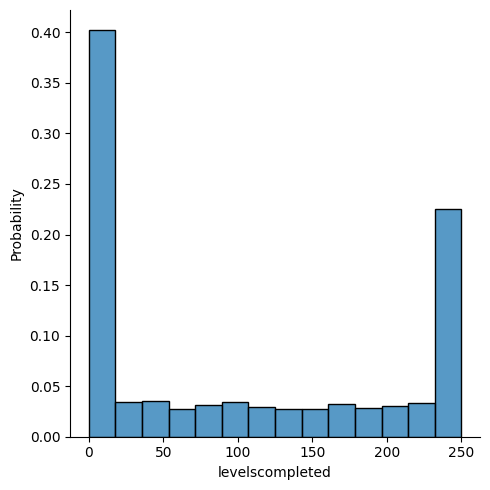

In [ ]:
sns.displot(df_player, x="levelscompleted", stat="probability")

**Question !!!**
Looking at the plot above, what insights can you draw about how players are distributed?
How would you explain this distribution to a product manager or marketing team?

**Exercise**
Create a histogram distribution for age?

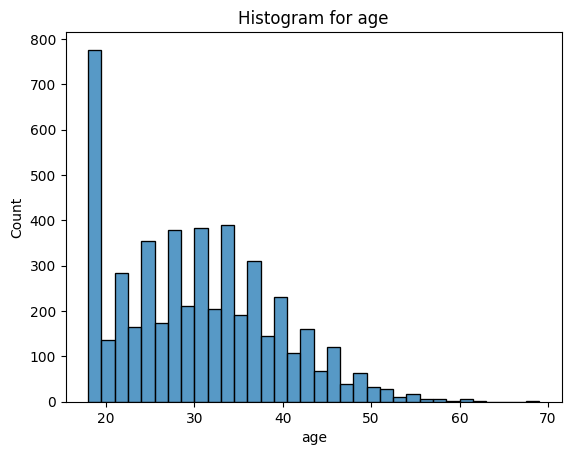

In [ ]:
# Histogram of age completed seaborn
plt.figure()
plt.title('Histogram for age')
sns.histplot(df_player['age'])
plt.show()

#### Density

In case we want to plot the distribution of the gameroundsplayed variable using a smooth curve then `sns.displot(kind="kde")`comes to our rescue:

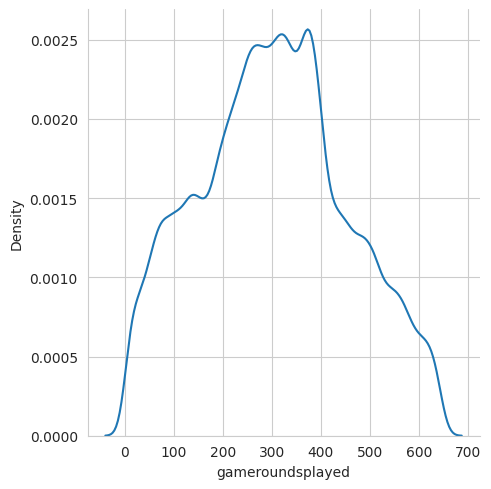

In [53]:
sns.displot(df_player, x="gameroundsplayed",kind="kde", bw_adjust=.5)

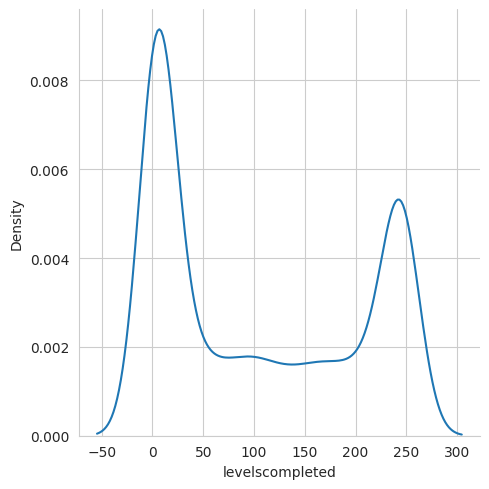

In [54]:
# Let's do it also for levelscompleted
sns.set_style("whitegrid")
sns.displot(df_player, x="levelscompleted",kind="kde")

#### Combined

Histogram and density plot can be combined within the sme plot. Let's do it for **levelscompleted**

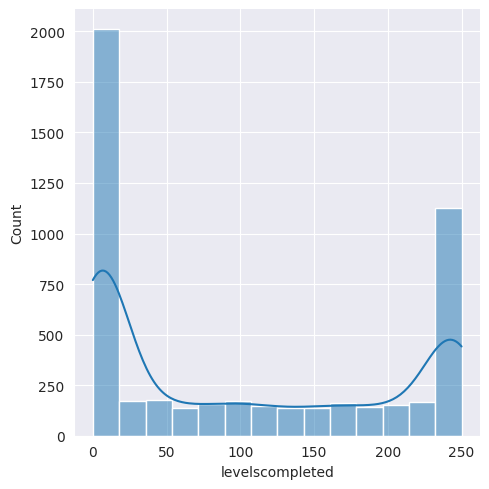

In [55]:
sns.set_style("darkgrid")
sns.displot(df_player,x="levelscompleted", kde=True)

#### Boxplot

We have seen boxplot for Excel, let's try to reproduce it with Python syntax.
Suggestion is to use **moneyspent** .

The syntax is quite similar between matplotlib and seaborn in case a single variable is plotted:

- `plt.boxplot(df[col])`

- `sns.boxplot(x='group',y='value',data=df)`

In `Section 5` several variables will be plotted.

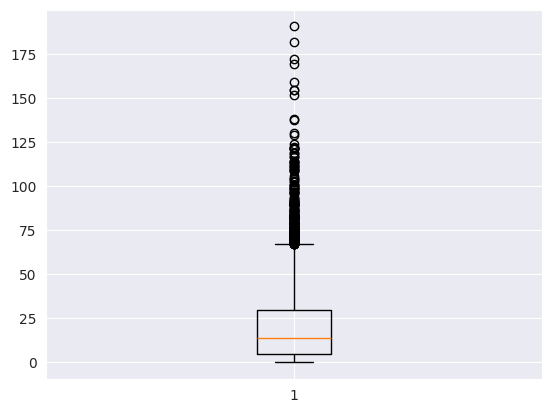

In [62]:
# Boxplot for moneyspent with matplotlib syntax
plt.figure()
plt.boxplot(df_player['moneyspent'])
plt.show()

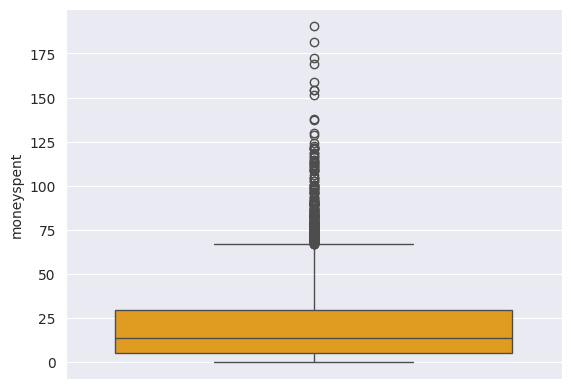

In [56]:
#The boxplot belongs to the catplot function
plt.figure()
sns.boxplot(df_player, y="moneyspent", color='orange')
plt.show()

# 5.&nbsp; Graphical summary for 1 continuous and 1 categorical variable

Some of this plot have been covered above for single continuous variable, but they can be also used to show relation between a continouous variable and a categorical.

- Density

- Boxplots

- Violin (Violin plot is new, but let's describe the concepts later)

The syntax is very similar to plotting a single variable — you just add an extra argument `(like hue=, x=, or col=)` to represent the categorical grouping in seaborn, or extra variables in `plt`.

Let's dive into it!

#### Density

Recall that for a single continouous variable such as **moneyspent** density plot syntax was

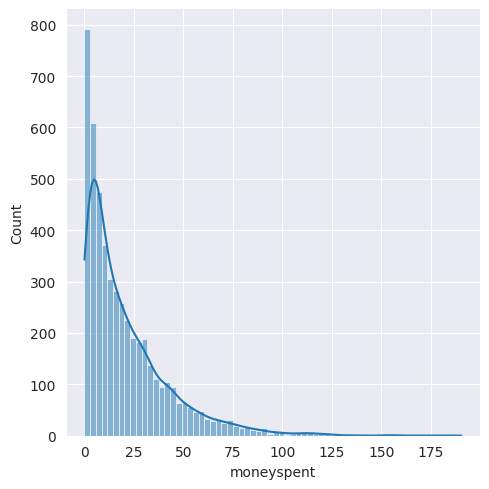

In [72]:
sns.displot(df_player, x="moneyspent",kde=True)

If we want to visualize money spent segmented by platform, we can add the `hue=` argument to sns.displot() to differentiate the groups by color.

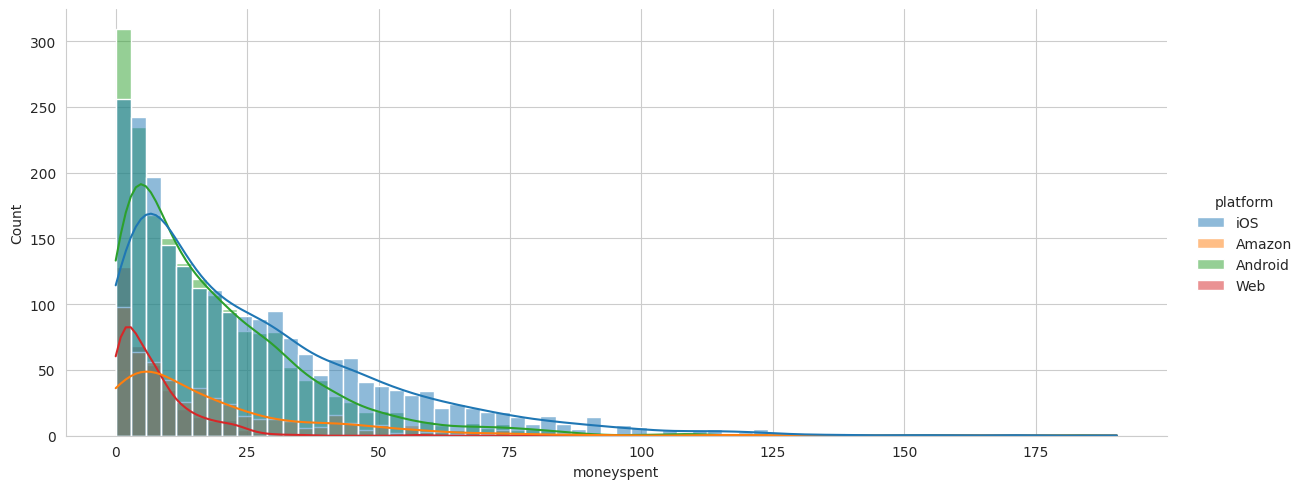

In [ ]:
#height → height of the plot in inches, aspect → width = height × aspect ratio
sns.displot(df_player, x="moneyspent", hue="platform", kde=True, height=5, aspect=2.4)

In addition to using `hue`, if you also pass the `col=` argument to `sns.displot()`, Seaborn will create a separate plot for each unique value in the column specified — allowing you to compare distributions across subgroups side by side.

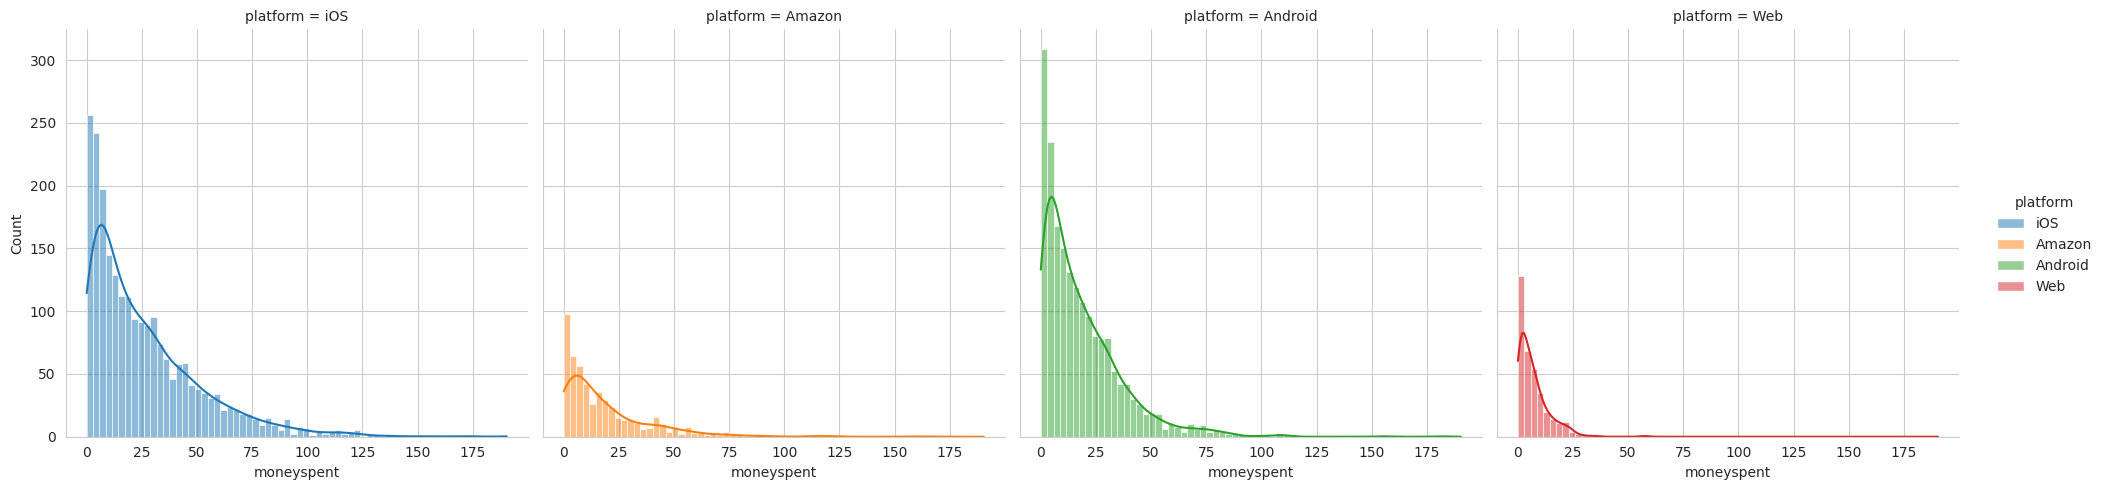

In [ ]:
sns.displot(df_player, x="moneyspent", hue="platform", kde=True, col="platform")

Recall that you can select certain values for a column in a Dataframe. For instance, let's select as regions just iOS and Web

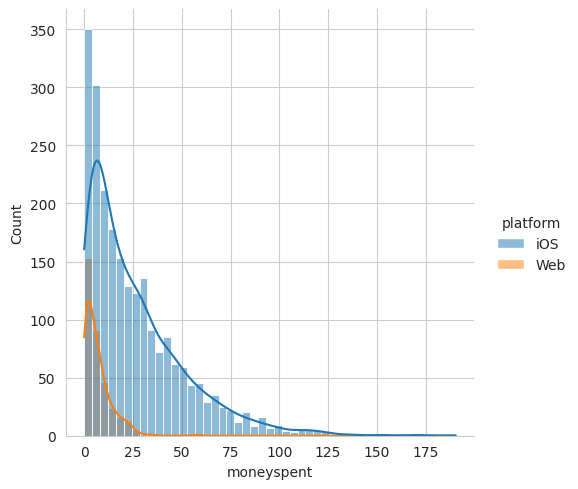

In [ ]:
sns.displot(df_player[df_player['platform'].isin(['iOS','Web'])], x="moneyspent", hue="platform", kde=True)

#### Boxplots

Recall that for a single continouous variable such as **moneyspent** Seaborn boxplot syntax was

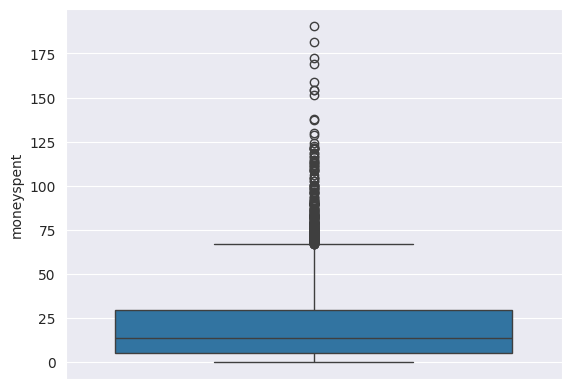

In [75]:
plt.figure()
sns.boxplot(df_player, y="moneyspent")
plt.show()

By adding argument `x=platform` allows us to compare the distribution of moneyspent across different platforms

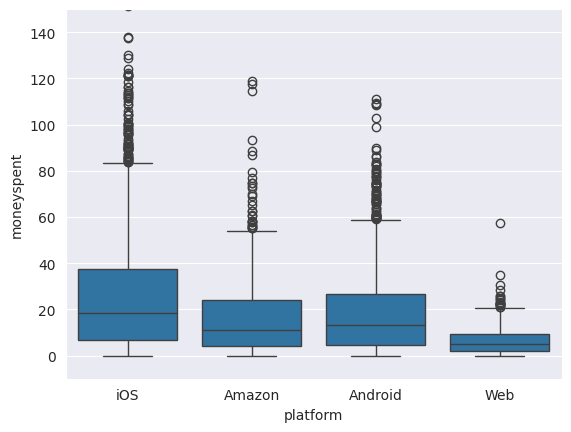

In [80]:
plt.figure()
sns.boxplot(df_player, y="moneyspent", x="platform")
plt.ylim(-10, 150)
plt.show()

Nice finding !!! It feels that money spent for Web is significantly less compared to other platforms. Actually, it feels that players in iOS also tend to spend more since average is close to 20`$` and Q3 it's almost 40`$`

In Matplotlib, there's no direct `hue=` or `x=` argument like in Seaborn, so you have to manually split your data and loop over the categories to simulate what Seaborn does automatically.

Thus for one variable is:

In [ ]:
# Boxplot for moneyspent with matplotlib syntax
plt.figure()
plt.boxplot(df_player['moneyspent'])
plt.show()

For **moneyspent** and **region**

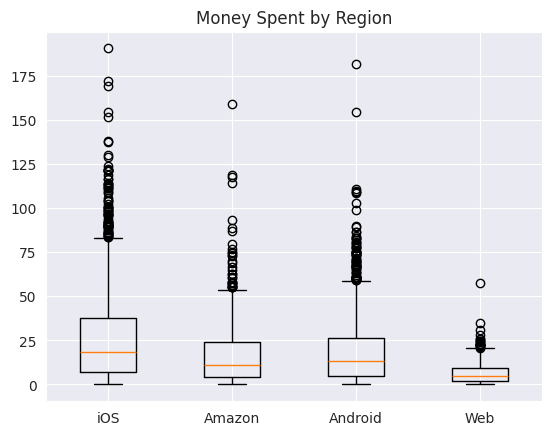

In [95]:
# Boxplot for moneyspent by region with Matplotlib
plt.figure()  # Optional: define size
plt.title("Money Spent by Region")
# Create boxplot for each region
plt.boxplot([
    df_player[df_player['platform'] == 'iOS']['moneyspent'],
    df_player[df_player['platform'] == 'Amazon']['moneyspent'],
    df_player[df_player['platform'] == 'Android']['moneyspent'],
    df_player[df_player['platform'] == 'Web']['moneyspent'],
])
# Add category labels to x-axis
plt.xticks([1, 2, 3 ,4 ], ['iOS', 'Amazon','Android','Web'])
# Customizations
plt.show()


#### Violin

A violin plot is a powerful way to visualize the distribution of a continuous variable for one or more categories. It combines the features of a boxplot and a kernel density plot (KDE) into a single graphic.

**Why is useful ?**

- It gives more detail than a boxplot — not just summary stats, but also the shape of the distribution.

- Great for comparing multiple groups (e.g., money spent across different platforms or regions).

- Helps detect bimodal distributions or skewness that boxplots might hide.

https://seaborn.pydata.org/generated/seaborn.violinplot.html

https://www.labxchange.org/library/items/lb:LabXchange:46f64d7a:html:1

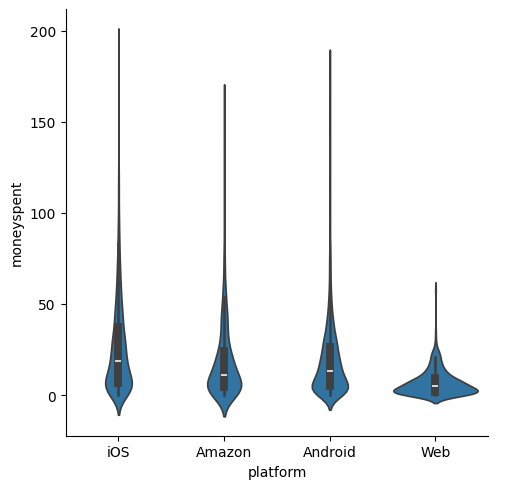

In [ ]:
sns.catplot(df_player, x="platform", y="moneyspent",kind="violin")

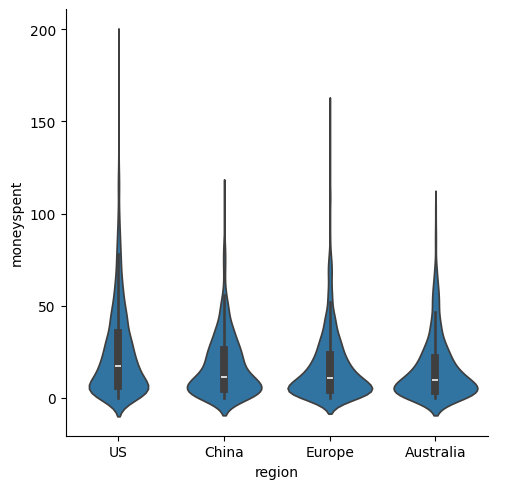

In [ ]:
sns.catplot(df_player, x="region", y="moneyspent",kind="violin")

# 6.&nbsp; Graphical summary for 2 categorical variables

For two categorical variables such as **region** and **platform** the appropiate graphs are either:

- Grouped bars

- Stacked bar chart


#### Grouped Bars

The intention is to get the distribution of players per region and platform.
Let's try it first with Matplotlib

Recreating a grouped bar plot with percentages using only Matplotlib (i.e., no Seaborn) requires a few more manual steps, since Matplotlib doesn't automatically calculate percentages or group bars by hue/category.

Thus we actually need to:

- 1 Create a pivot table and store it in a dataframe

- 2 Compute the percentages per region, since from step 1 absolute values are given

- 3 Plot the resulting dataframe

In [ ]:
# Step 1
df_region_platform = pd.pivot_table(df_player, index='region', columns='platform', values='playerid', aggfunc='count')
df_region_platform

platform,Amazon,Android,Web,iOS
region,,,,
Australia,46,297,41,123
China,52,333,50,50
Europe,122,730,128,319
US,291,519,132,1767


In [ ]:
# Step 2
df_region_platform_pct = df_region_platform.div(df_region_platform.sum().sum()) * 100
df_region_platform_pct

platform,Amazon,Android,Web,iOS
region,,,,
Australia,0.92,5.94,0.82,2.46
China,1.04,6.66,1.00,1.00
Europe,2.44,14.60,2.56,6.38
US,5.82,10.38,2.64,35.34


<Figure size 640x480 with 0 Axes>

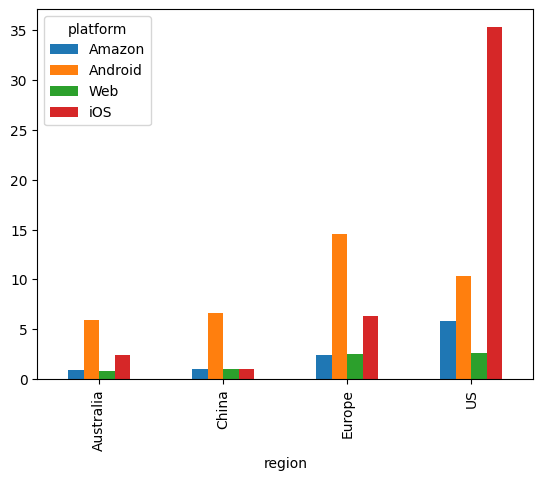

In [ ]:
# Grouped bar for region and platform with matplotlib
plt.figure()
df_region_platform_pct.plot(kind='bar', stacked=False)
plt.show()

Seaborn syntax for grouped bar chart can be as follows:


<Axes: xlabel='region', ylabel='count'>

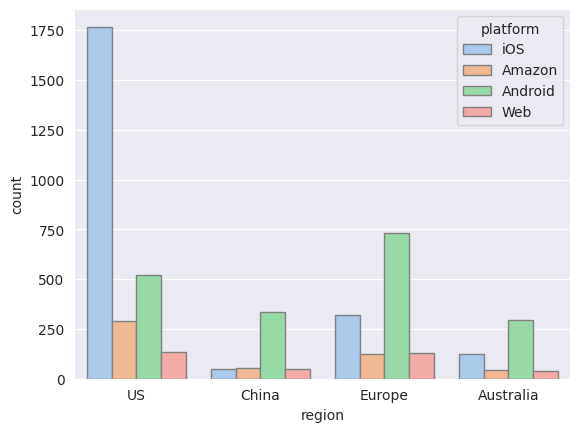

In [111]:
sns.countplot(
    data=df_player,
    x="region",           # Main categories on x-axis
    hue="platform",       # Grouped bars by platform
    palette="pastel",
    edgecolor="0.5"
)

#### Stacked Bars

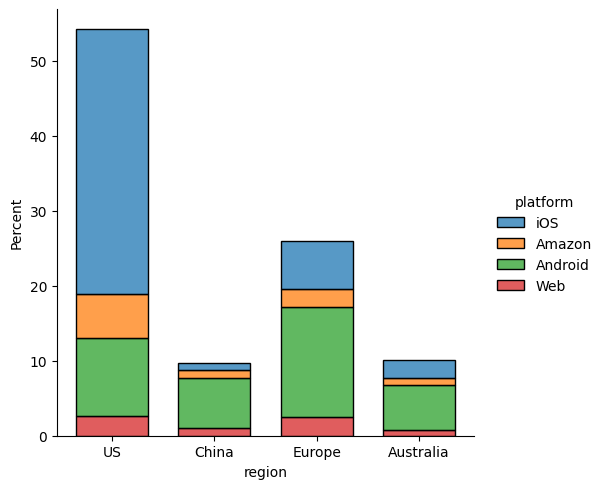

In [ ]:
sns.displot(df_player, x="region", discrete=True,hue="platform",multiple="stack", shrink=0.7,stat="percent")

<Axes: xlabel='region'>

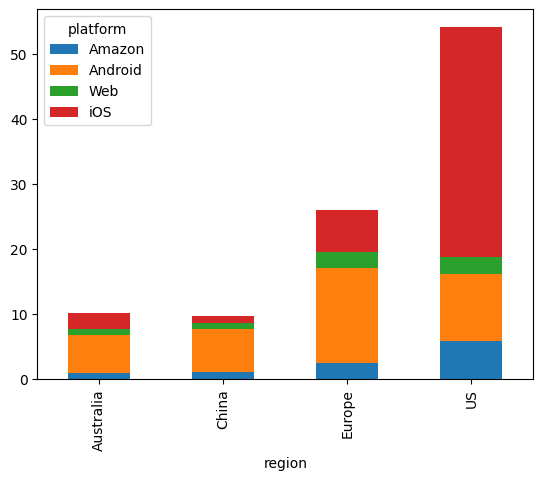

In [ ]:
df_region_platform_pct.plot(kind='bar', stacked=True)

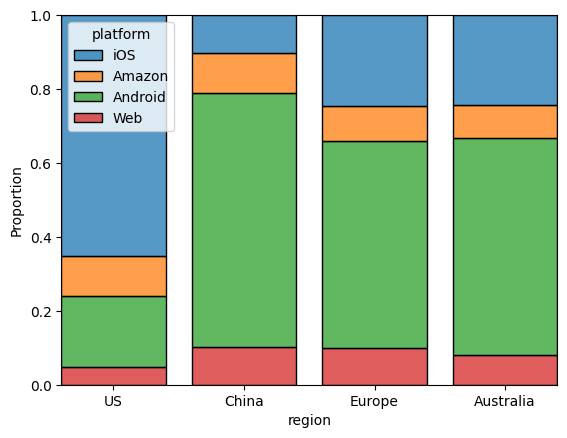

In [ ]:
plt.figure()
sns.histplot(df_player, x="region", hue="platform", multiple="fill", stat="proportion",  discrete=True, shrink=.8)
plt.show()

# 7.&nbsp; Graphical summary for 2 continuous variables

To compare two continuous random variables scatter plot is the default option.
Let's consider **gameroundsplayed** and **levelscompleted**

As stated in the Cheat sheet the commandas for scatter plot are:

- `plt.scatter(x,y)`

- `sns.scatterplot(x='x',y='y',data=df)`

Since there are 5000 data points, a subsample will be selected

In [70]:
df_player_sample = df_player[(df_player.levelscompleted>20) & (df_player.levelscompleted<240)].sample(n=500)
df_player_sample.head()

,playerid,platform,age,daysingame,companygamesplayed,gameroundsplayed,levelscompleted,moneyspent,region
397,P00398,iOS,43,105,2,233,69,2.59,US
1276,P01277,Android,53,71,3,75,44,23.29,US
3374,P03375,Android,18,13,2,279,162,0.06,Europe
2293,P02294,Android,21,157,0,330,163,5.77,Europe
3465,P03466,iOS,18,160,3,447,151,5.17,Europe



#### Scatter plot

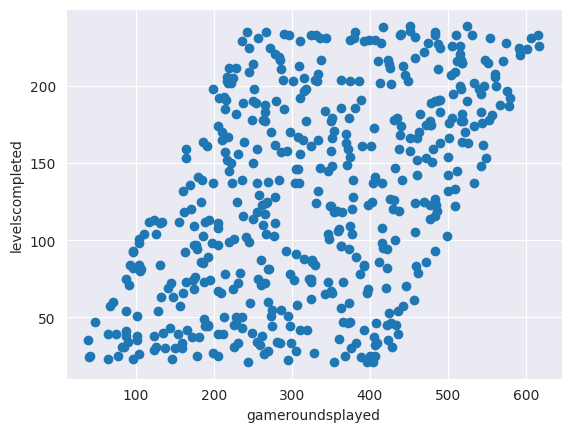

In [69]:
# With matplotlib
plt.figure()
plt.scatter(df_player_sample['gameroundsplayed'], df_player_sample['levelscompleted'])
plt.xlabel('gameroundsplayed')
plt.ylabel('levelscompleted')
plt.show()

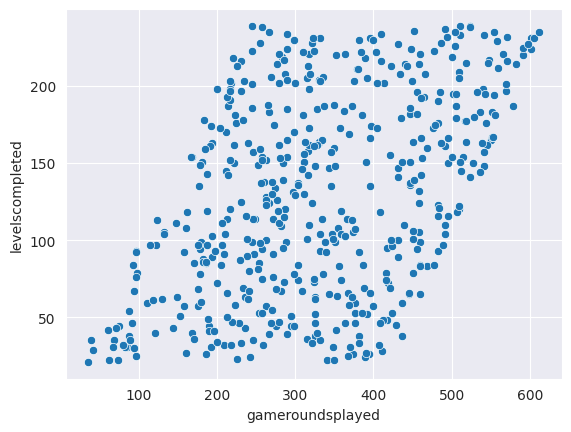

In [98]:
# Scatter with Seaborn
plt.figure()
sns.scatterplot(df_player_sample, x="gameroundsplayed", y="levelscompleted")
plt.xlabel('gameroundsplayed')
plt.ylabel('levelscompleted')
plt.show()

# 8.&nbsp; Multivariate plots

Multivariate plots are visualizations that show the relationships between three or more variables at the same time. Unlike univariate plots (which show just one variable) multivariate plots help us uncover more complex patterns, interactions, or trends that involve multiple dimensions of the data.

In this section, we’ll cover some of the most common multivariate plot types in Seaborn:

- jointplot(): Combines a scatterplot with marginal histograms or KDE plots, and can incorporate a third variable with hue=.

  `sns.jointplot(data=df, x='', y='', hue='', kind='')`


- pairplot(): Displays all pairwise relationships between numeric variables in a dataset, along with their individual distributions.

  `sns.pairplot(df[['age', 'moneyspent', 'gamerounds', 'region']], hue='region)`

- heatmap(): A visual correlation matrix that helps us understand how all numeric variables relate to each other at a glance

  `sns.heatmap(df.corr(), annot=True, cmap='coolwarm')`




#### Scatter plot and histograms

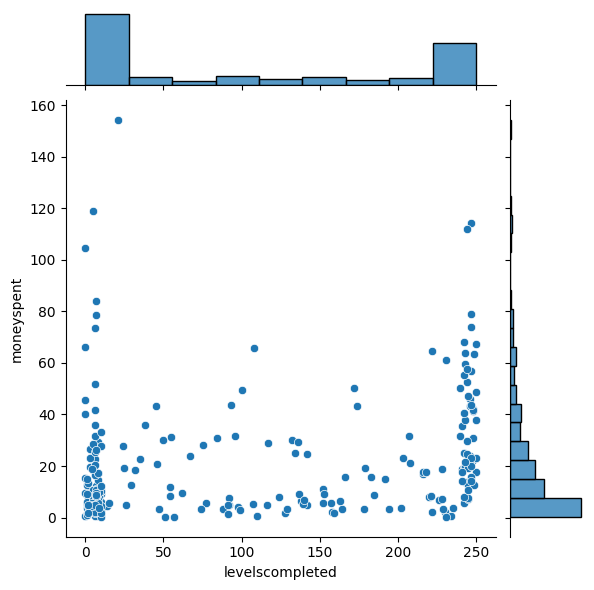

In [ ]:
sns.jointplot(df_player.head(250), x="levelscompleted", y="moneyspent");

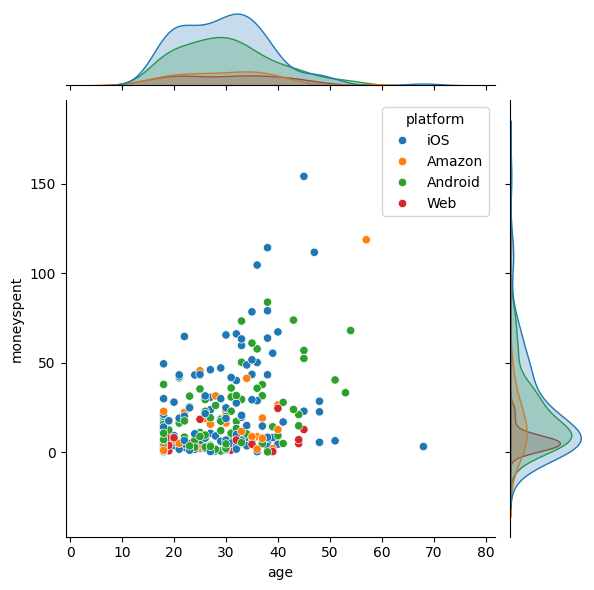

In [ ]:
sns.jointplot(df_player.head(250), x="age", y="moneyspent",hue="platform")

#### Correlation grid

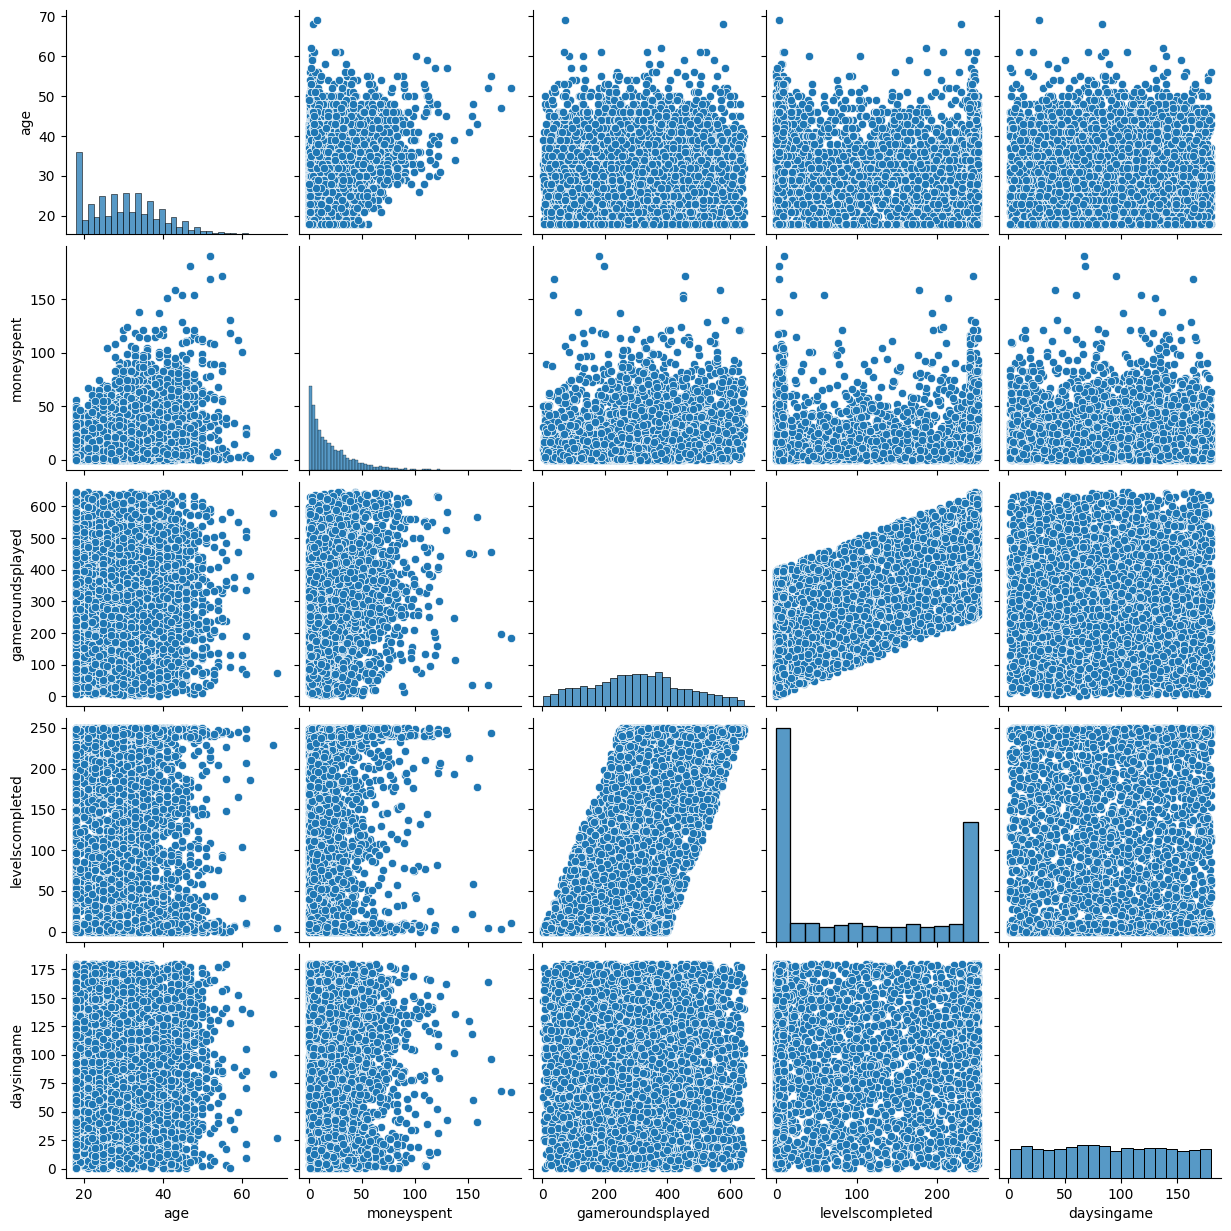

In [ ]:
sns.pairplot(df_player[["age","moneyspent","gameroundsplayed","levelscompleted","daysingame"]])

<Axes: >

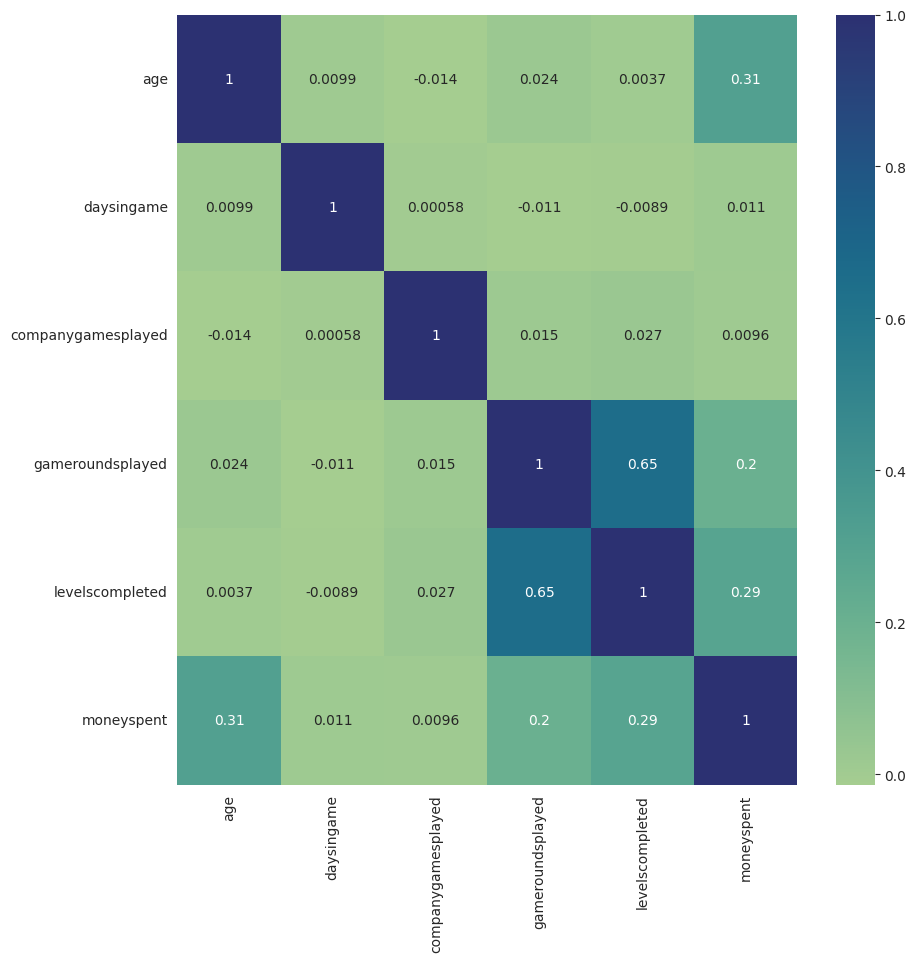

In [105]:
plt.figure(figsize=(10,10))
c= df_player.corr(numeric_only = True)
sns.heatmap(c,cmap="crest",annot=True)

# 9.&nbsp;- Statistical measure

## 📊 Descriptive Statistics Cheat Sheet

This section summarizes the most important **statistical functions** you can use in pandas to analyze one or more variables in your dataset.

---

### 📏 1. Central Tendency and Dispersion (Univariate)

These functions help describe the **shape and spread** of a single variable (e.g., `spend`, `time_in_game`):

| Metric                | Code                                  | Description                          |
|----------------------|---------------------------------------|--------------------------------------|
| **Mean**             | `df['x'].mean()`                      | Average value                        |
| **Median**           | `df['x'].median()`                    | Middle value                         |
| **Mode**             | `df['x'].mode()`                      | Most frequent value(s)               |
| **Standard Deviation** | `df['x'].std()`                     | Spread around the mean               |
| **Variance**         | `df['x'].var()`                       | Squared spread around the mean       |
| **Min / Max**        | `df['x'].min()` / `df['x'].max()`     | Lowest / highest value               |
| **Quartiles**        | `df['x'].quantile(0.25)`              | Percentile-based summaries           |
| **Summary**          | `df['x'].describe()`                  | All key stats in one view            |
| **Skewness**         | `df['x'].skew()`                      | Asymmetry of the distribution        |
| **Kurtosis**         | `df['x'].kurt()`                      | How "peaked" or "tailed" the data is |

---

### 🔗 2. Relationship Between Two Variables (Bivariate)

These metrics show **how two variables relate** to each other.

| Metric                   | Code                                                 | Description                                 |
|--------------------------|------------------------------------------------------|---------------------------------------------|
| **Covariance**           | `df[['x', 'y']].cov()` or `df['x'].cov(df['y'])`    | How two variables vary together             |
| **Correlation (Pearson)**| `df[['x', 'y']].corr()` or `df['x'].corr(df['y'])`  | Linear relationship strength (-1 to 1)      |
| **Spearman Correlation** | `df.corr(method='spearman')`                        | Rank-based correlation                      |
| **Kendall Correlation**  | `df.corr(method='kendall')`                         | Based on concordant/discordant pairs        |

---

### 📚 Optional Advanced: Standardization & Outlier Detection

```python
# Z-score standardization
df_player['z_spend'] = (df_player['moneyspent'] - df_player['moneyspent'].mean()) / df_player['moneyspent'].std()

# IQR-based outlier detection
Q1 = df_player['moneyspent'].quantile(0.25)
Q3 = df_player['moneyspent'].quantile(0.75)
IQR = Q3 - Q1
outliers = df_player[(df_player['moneyspent'] < Q1 - 1.5 * IQR) | (df_player['moneyspent'] > Q3 + 1.5 * IQR)]
```

---

✅ Use these tools to summarize, compare, and investigate your dataset with confidence!


 ## Central Tendency and Dispersion (Univariate)

In [15]:
df_player.head()

,playerid,platform,age,daysingame,companygamesplayed,gameroundsplayed,levelscompleted,moneyspent,region
0,P00001,iOS,34,104,2,113,92,4.95,US
1,P00002,iOS,28,129,3,164,8,0.74,US
2,P00003,Amazon,36,56,1,386,1,8.75,China
3,P00004,iOS,45,118,0,35,21,154.19,US
4,P00005,iOS,27,132,2,104,84,30.74,Europe


In [16]:
print("Mean:", df_player['moneyspent'].mean())
print("Standard Deviation:", df_player['moneyspent'].std())
print("Variance:", df_player['moneyspent'].var())
print("Median:", df_player['moneyspent'].median())
print("Mode:", df_player['moneyspent'].mode().values)
print("Min:", df_player['moneyspent'].min())
print("Max:", df_player['moneyspent'].max())

# Quartiles
print("25th percentile (Q1):", df_player['moneyspent'].quantile(0.25))
print("50th percentile (Median/Q2):", df_player['moneyspent'].quantile(0.5))
print("75th percentile (Q3):", df_player['moneyspent'].quantile(0.75))

Mean: 20.957702
Standard Deviation: 21.99971701020039
Variance: 483.9875485289004
Median: 13.97
Mode: [0.06]
Min: 0.0
Max: 190.42
25th percentile (Q1): 5.0275
50th percentile (Median/Q2): 13.97
75th percentile (Q3): 29.845


In [17]:
df_player.head()

,playerid,platform,age,daysingame,companygamesplayed,gameroundsplayed,levelscompleted,moneyspent,region
0,P00001,iOS,34,104,2,113,92,4.95,US
1,P00002,iOS,28,129,3,164,8,0.74,US
2,P00003,Amazon,36,56,1,386,1,8.75,China
3,P00004,iOS,45,118,0,35,21,154.19,US
4,P00005,iOS,27,132,2,104,84,30.74,Europe


## Relationship Between Variables (Bivariate)



In [104]:
# Covariance
print("Covariance matrix:")
print(df_player[['gameroundsplayed', 'levelscompleted']].cov())

# Correlation matrix (Pearson by default)
print("Correlation matrix:")
print(df_player[['gameroundsplayed', 'levelscompleted']].corr())
print()

# Pairwise correlation
print("Correlation between spend and time_in_game:", df_player['gameroundsplayed'].corr(df_player['levelscompleted']))
print()

# Pairwise correlation age and moneyspent
print("Correlation between age and moneyspent:", df_player['age'].corr(df_player['moneyspent']))

Covariance matrix:
                  gameroundsplayed  levelscompleted
gameroundsplayed      22968.398684       9831.67415
levelscompleted        9831.674150       9997.35790
Correlation matrix:
                  gameroundsplayed  levelscompleted
gameroundsplayed          1.000000         0.648813
levelscompleted           0.648813         1.000000

Correlation between spend and time_in_game: 0.6488129317312086

Correlation between age and moneyspent: 0.31192133588664317
